# Machine Learning (laboratory instruction)
## Logistic regression

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 04-Logistic regression (part 2) - training the model.ipynb
+-- 📜 device.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
Implement Logistic regression algorithm and use it for classification problem.


### Task 1. Read the dataset from file (*0 points*).

Read the dataset from file. 
This is a dataset that contains information read from sensors of cars' devices. The value 0 indicates that all the devices are original, and 1 means that at least one of the devices was replaced (not authorized).

**Tip**: You can use below code to read the data:

```python
with open('device.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
    
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, random_state=123, shuffle=True)  
```


In [2]:
# >>> WRITE YOUR CODE BELOW <<<
import numpy as np
import sklearn
from sklearn import *
import matplotlib.pyplot as plt

with open('device.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, random_state=123, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(500, 100) (500, 100) (500,) (500,)


### Task 1. Implement Logistic function 

Implement Logistic function (also called Sigmoid function):
$$
S(x) = \dfrac{1}{1 + e^{-x}}
$$

Display the chart of the function in range of -8, 8.

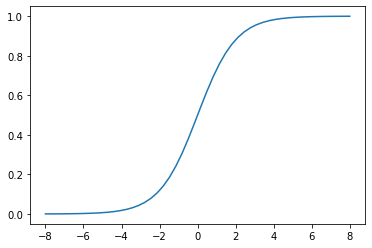

In [4]:
# >>> WRITE YOUR CODE BELOW <<<
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-8, 8)
plt.plot(x, sigmoid(x))

### Task 2. Train model.

To perform prediction the below formula can be used:

$$
f(x) = S(x\theta)
$$

The returned value gives the probability that the output is 1 or 0. To get the prediction the value should be rounded. We can predict the values 0 and 1 using below formula:
    
$$
\begin{align}
y = \begin{cases}
0&\text{if $S(x\theta) < 0.5$}\\
1&\text{if $S(x\theta) \ge 0.5$}\\
\end{cases}
\end{align}
$$

To train model in logistic regression we need to use a different cost function (MSE will NOT work here).
Because now we have two cases, one when we predict the probability that the sample belongs to class 0 and the second for class 1, the cost function (for one sample) can be defined as:

$$
\begin{align}
c(\theta) = \begin{cases}
-log(1 - f(x))&\text{if $y = 0$}\\
-log(f(x))&\text{if $y = 1$}\\
\end{cases}
\end{align}
$$

To calculate it for all samples we can define iterative formula as follows:

$$
c(\theta)-\frac{1}{m}\sum^m_{i}[t^{(i)}log(S(f(x^{(i)}))) + (1 - t^{(i)})log(1 - S(f(x)))]
$$

And the vectorized form:


$$
c(\theta) = \frac{1}{m} \cdot \left(-t^{T}\log(h)-(1-t)^{T}\log(1-h)\right) 
$$

, where $h = S(x\theta)$

To train the model using Gradient Descent we need to define gradient:


$$
\nabla = \frac{1}{m}x^T(S(x\theta) - t)
$$

Note: that the target values are denoted $t$ because $y$ was used in one of above formula.



In [5]:
# >>> WRITE YOUR CODE BELOW <<<
from numba import njit
def to_labels(x, w):
    h = sigmoid(x @ w.T)
    h[h >= 0.5] = 1
    h[h < 0.5] = 0
    return h

def accuracy(predictions, targets):
    return (predictions == targets).sum() / predictions.shape[0]

def log_loss(x, w, targets, l = 0):
    predictions = sigmoid(x @ w.T)
    return (1/x.shape[0]) * np.sum((-targets * np.log(predictions) - (1 - targets) * np.log(1 - predictions))) + l * np.linalg.norm(w)**2

def grad(x, w, targets, l = 0):
    predictions = sigmoid(x @ w.T)
    return (1 / targets.shape[0]) * (x.T @ np.subtract(predictions, targets)) + (2 * l * w)

### Task 3. Results.

Plot the train and test loss. Display the accuracy metric.

Final error (train): 0.4230667081803644 | Final error (test): 0.47929646553596233 
Final weights: [ 3.95344098e-02  3.98365221e-02  1.94348841e-02  3.82600125e-02
 -4.38785981e-02  6.21853216e-02  1.42468470e-02  4.02450354e-02
  9.29256581e-02  7.17916688e-02  4.90766482e-02  1.32066125e-02
  5.41804502e-02 -4.01668658e-02  3.46190310e-01  6.29106971e-02
 -2.56499556e-02  6.38751442e-02 -6.89024521e-02  3.95792833e-02
 -9.59409507e-02  3.51109311e-02 -6.82231117e-02 -6.74915220e-03
 -2.23194492e-02  2.90008160e-02  2.47936648e-03  2.96085417e-02
 -1.41970750e-02 -3.12645911e-02 -9.88272740e-03  3.48119720e-02
  6.09404332e-02 -1.92686104e-01  8.30501787e-02  5.81820780e-03
 -2.81602547e-02  6.13316611e-02  4.24265735e-02 -4.34323341e-05
 -3.52821508e-02 -3.03292819e-02  4.58542675e-02 -2.25705389e-02
  4.85366545e-03 -3.34907374e-02  1.20192749e-02  5.70350160e-02
  1.24025406e-01  6.95591966e-02  3.74981480e-02  2.77272769e-02
  2.58720818e-02  2.15388476e-02  3.23579734e-02  2.04198

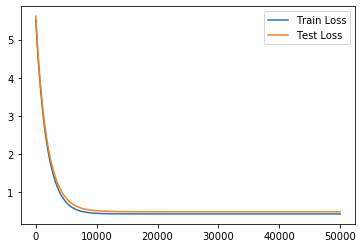

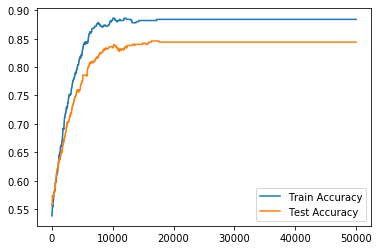

In [7]:
# >>> WRITE YOUR CODE BELOW <<<
#x = np.hstack((np.ones(len(x)).reshape(-1, 1), x))
w = np.random.uniform(size=(100,))
lr = 1e-3
epochs = 50000
l = 0.1
history = {'train': [], 'test': []}
acc = {'train': [], 'test': []}
for i in range(epochs):
    error = log_loss(x_train, w, y_train, l)
    w -= lr * grad(x_train, w, y_train, l)
    history['train'].append(error)
    labels = to_labels(x_train, w)
    acc['train'].append(accuracy(labels, y_train))
    
    test_error = log_loss(x_test, w, y_test, l)
    history['test'].append(test_error)
    test_labels = to_labels(x_test, w)
    acc['test'].append(accuracy(test_labels, y_test))

print(f'Final error (train): {history["train"][-1]} | Final error (test): {history["test"][-1]} ')
print(f'Final weights: {w}')
plt.plot(history['train'], label='Train Loss')
plt.plot(history['test'], label='Test Loss')
plt.legend()
plt.show()

plt.plot(acc['train'], label='Train Accuracy')
plt.plot(acc['test'], label='Test Accuracy')
plt.legend()
plt.show()
